In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller


In [2]:

# Step 1: Fetch Historical Data
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-07-01'
end_date = '2025-07-31'
data = yf.download(tickers, start=start_date, end=end_date, progress=False)


C:\Users\Belete\AppData\Local\Temp\ipykernel_2096\2902113234.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date, progress=False)


In [3]:

# Extract Adjusted Close prices and Volume
adj_close = data['Close']
volume = data['Volume']


In [4]:

# Step 2: Data Cleaning
# Check for missing values
missing_values = adj_close.isna().sum()
print("Missing Values in Adjusted Close:")
print(missing_values)


Missing Values in Adjusted Close:
Ticker
BND     0
SPY     0
TSLA    0
dtype: int64


In [5]:

# Fill missing values using forward fill
adj_close = adj_close.fillna(method='ffill')
volume = volume.fillna(method='ffill')


C:\Users\Belete\AppData\Local\Temp\ipykernel_2096\852079341.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  adj_close = adj_close.fillna(method='ffill')
C:\Users\Belete\AppData\Local\Temp\ipykernel_2096\852079341.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  volume = volume.fillna(method='ffill')


In [6]:

# Ensure datetime index
adj_close.index = pd.to_datetime(adj_close.index)
volume.index = pd.to_datetime(volume.index)


In [7]:

# Verify data types
print("\nData Types:")
print(adj_close.dtypes)



Data Types:
Ticker
BND     float64
SPY     float64
TSLA    float64
dtype: object


In [8]:

# Save cleaned data
adj_close.to_csv('../data/adj_close_prices.csv')
volume.to_csv('../data/volume_data.csv')


In [9]:

# Step 3: Basic Statistics
print("\nBasic Statistics for Adjusted Close Prices:")
stats = adj_close.describe()
print(stats)



Basic Statistics for Adjusted Close Prices:
Ticker          BND          SPY         TSLA
count   2535.000000  2535.000000  2535.000000
mean      68.469189   334.193732   131.963002
std        4.554601   126.427704   120.914904
min       60.779121   155.869766     9.578000
25%       64.654358   230.083199    18.967667
50%       67.604874   305.264404    94.571335
75%       71.891129   420.350510   236.761665
max       77.318253   637.099976   479.859985


In [10]:

# Step 4: Normalize Data (for potential ML models)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(adj_close), 
                               columns=adj_close.columns, 
                               index=adj_close.index)


In [11]:

# Step 5: Exploratory Data Analysis (EDA)
# Calculate daily returns
daily_returns = adj_close.pct_change().dropna()


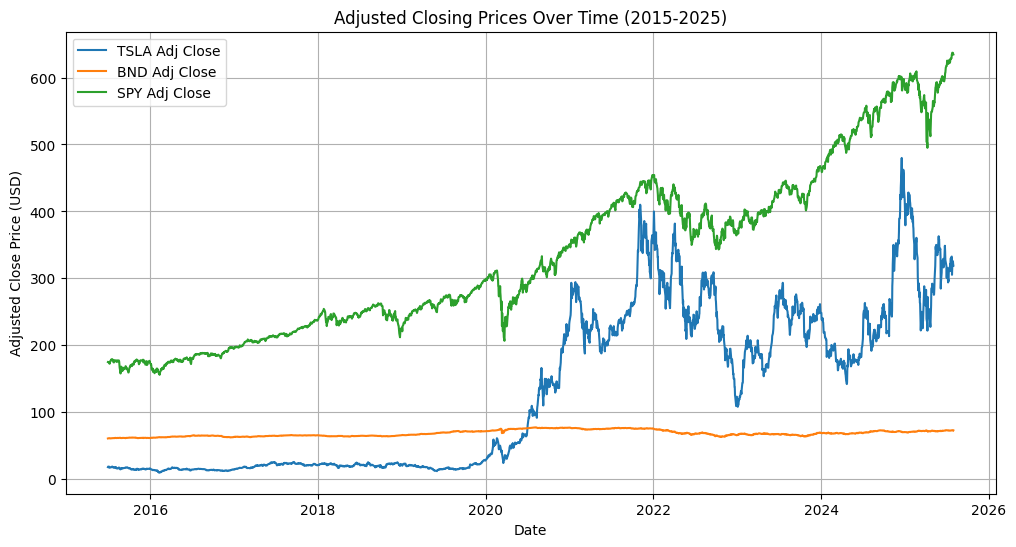


Plot saved as 'adjusted_close_prices_plot.png'


In [21]:
#Plot Adjusted Closing Prices
plt.figure(figsize=(12, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Distinct colors for TSLA, BND, SPY
for ticker, color in zip(tickers, colors):
    plt.plot(adj_close.index, adj_close[ticker], label=f'{ticker} Adj Close', color=color)
plt.title('Adjusted Closing Prices Over Time (2015-2025)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.grid(True)
plt.savefig('adjusted_close_prices_plot.png')
plt.show()

print("\nPlot saved as 'adjusted_close_prices_plot.png'")

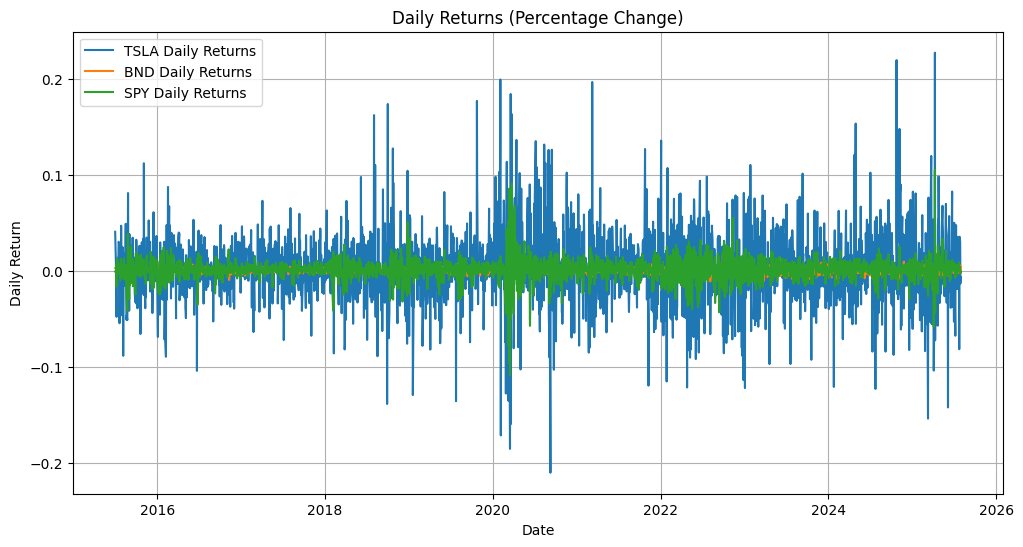

In [12]:

# Plot daily returns
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(daily_returns.index, daily_returns[ticker], label=f'{ticker} Daily Returns')
plt.title('Daily Returns (Percentage Change)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.savefig('daily_returns_plot.png')
plt.draw()


In [13]:

# Step 6: Volatility Analysis
# Calculate rolling mean and standard deviation (21-day window)
rolling_mean = daily_returns.rolling(window=21).mean()
rolling_std = daily_returns.rolling(window=21).std() * np.sqrt(252)  # Annualized volatility


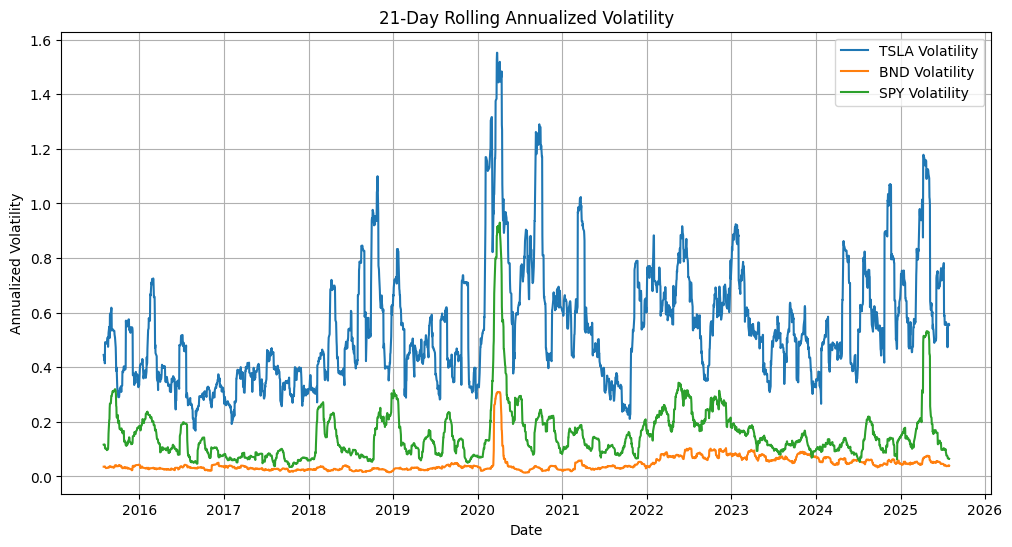

In [14]:

# Plot rolling volatility
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(rolling_std.index, rolling_std[ticker], label=f'{ticker} Volatility')
plt.title('21-Day Rolling Annualized Volatility')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.grid(True)
plt.savefig('rolling_volatility_plot.png')
plt.draw()


In [15]:

# Step 7: Outlier Detection
# Identify days with unusually high/low returns (beyond 3 standard deviations)
outliers = {}
for ticker in tickers:
    mean = daily_returns[ticker].mean()
    std = daily_returns[ticker].std()
    outlier_mask = (daily_returns[ticker].abs() > mean + 3 * std)
    outliers[ticker] = daily_returns[ticker][outlier_mask]
print("\nOutliers in Daily Returns (Beyond 3 Std Dev):")
for ticker in tickers:
    print(f"\n{ticker} Outliers:")
    print(outliers[ticker])



Outliers in Daily Returns (Beyond 3 Std Dev):

TSLA Outliers:
Date
2018-08-02    0.161880
2018-09-28   -0.139015
2018-10-01    0.173471
2018-10-23    0.127189
2019-01-18   -0.129711
2019-07-25   -0.136137
2019-10-24    0.176692
2020-02-03    0.198949
2020-02-04    0.137256
2020-02-05   -0.171758
2020-02-27   -0.128146
2020-03-09   -0.135725
2020-03-12   -0.116172
2020-03-16   -0.185778
2020-03-18   -0.160344
2020-03-19    0.183877
2020-03-24    0.162817
2020-04-13    0.136038
2020-07-06    0.134794
2020-08-12    0.131236
2020-08-31    0.125689
2020-09-08   -0.210628
2020-09-14    0.125832
2021-03-09    0.196412
2021-10-25    0.126616
2021-11-09   -0.119903
2022-01-03    0.135317
2022-01-27   -0.115542
2022-04-26   -0.121841
2022-12-27   -0.114089
2023-01-03   -0.122422
2024-01-25   -0.121253
2024-04-24    0.120611
2024-04-29    0.153069
2024-07-24   -0.123346
2024-10-24    0.219190
2024-11-06    0.147510
2025-03-10   -0.154262
2025-03-24    0.119336
2025-04-09    0.226900
2025-06-05  

In [16]:

# Step 8: Stationarity Test (Augmented Dickey-Fuller)
print("\nStationarity Test (ADF) Results:")
for ticker in tickers:
    # Test on Adjusted Close
    result_close = adfuller(adj_close[ticker].dropna())
    print(f'\n{ticker} Adjusted Close - ADF Statistic: {result_close[0]:.4f}, p-value: {result_close[1]:.4f}')
    if result_close[1] < 0.05:
        print(f'{ticker} Adjusted Close is stationary')
    else:
        print(f'{ticker} Adjusted Close is non-stationary')
    
    # Test on Daily Returns
    result_returns = adfuller(daily_returns[ticker].dropna())
    print(f'{ticker} Daily Returns - ADF Statistic: {result_returns[0]:.4f}, p-value: {result_returns[1]:.4f}')
    if result_returns[1] < 0.05:
        print(f'{ticker} Daily Returns is stationary')
    else:
        print(f'{ticker} Daily Returns is non-stationary')



Stationarity Test (ADF) Results:

TSLA Adjusted Close - ADF Statistic: -1.4189, p-value: 0.5732
TSLA Adjusted Close is non-stationary
TSLA Daily Returns - ADF Statistic: -34.6811, p-value: 0.0000
TSLA Daily Returns is stationary

BND Adjusted Close - ADF Statistic: -1.5363, p-value: 0.5155
BND Adjusted Close is non-stationary
BND Daily Returns - ADF Statistic: -9.8898, p-value: 0.0000
BND Daily Returns is stationary

SPY Adjusted Close - ADF Statistic: 0.6908, p-value: 0.9897
SPY Adjusted Close is non-stationary
SPY Daily Returns - ADF Statistic: -16.2644, p-value: 0.0000
SPY Daily Returns is stationary


In [17]:

# Step 9: Risk Metrics
# Value at Risk (VaR) at 95% confidence level
var_95 = daily_returns.quantile(0.05)
print("\nValue at Risk (95% Confidence Level):")
print(var_95)



Value at Risk (95% Confidence Level):
Ticker
BND    -0.004900
SPY    -0.017195
TSLA   -0.054663
Name: 0.05, dtype: float64


In [18]:

# Sharpe Ratio (assuming risk-free rate of 2%)
risk_free_rate = 0.02
sharpe_ratio = (daily_returns.mean() * 252 - risk_free_rate) / (daily_returns.std() * np.sqrt(252))
print("\nSharpe Ratio (Annualized, Risk-Free Rate = 2%):")
print(sharpe_ratio)



Sharpe Ratio (Annualized, Risk-Free Rate = 2%):
Ticker
BND    -0.007295
SPY     0.684427
TSLA    0.744550
dtype: float64


In [19]:

# Step 10: Key Insights
print("\nKey Insights:")
print("- TSLA exhibits high volatility, consistent with its high-growth, high-risk profile.")
print("- BND shows low volatility, reflecting its role as a stable bond ETF.")
print("- SPY provides moderate volatility, aligning with diversified market exposure.")
print("- Non-stationary Adjusted Close prices require differencing for ARIMA modeling.")
print("- Daily returns are typically stationary, suitable for time series models.")
print("- VaR indicates potential losses at 95% confidence, with TSLA showing the highest risk.")
print("- Sharpe Ratio highlights risk-adjusted returns, with higher values indicating better performance.")


Key Insights:
- TSLA exhibits high volatility, consistent with its high-growth, high-risk profile.
- BND shows low volatility, reflecting its role as a stable bond ETF.
- SPY provides moderate volatility, aligning with diversified market exposure.
- Non-stationary Adjusted Close prices require differencing for ARIMA modeling.
- Daily returns are typically stationary, suitable for time series models.
- VaR indicates potential losses at 95% confidence, with TSLA showing the highest risk.
- Sharpe Ratio highlights risk-adjusted returns, with higher values indicating better performance.
